# Stock Price Vs Stock Google Searches

## Introduction:

This notebook is to explore the relation that search interest in a stock ticker has to do with the historical information for that stock. The data will be taken from historical stock data provided from Yahoo Finance and from search interest data gathered from Google Trends. For the purposes of this project I will only be looking at the level of search interest by observing the level of searches for the stocks ticker symbol. I will explore whether there is correlation between the absolute percent change in the stock and search interest in a stock. I will aslo explore whether there is correlation between stock trading volume and search interest in a stock. The correlation will be calculated by doing simple linear regression analysis. The end product should produce a linear regression graph for viewing for each study. The end product should also include linear regression equation informaiton and R squared for each study. Data for the last 5 years is gathered to get the most accurate results.

#### Imports:

In [1]:
# To use dataframes & view csv file from google
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime

# To get data from yahoo
import pandas_datareader as pdr

# To get search data from google
import pytrends
from pytrends.request import TrendReq

# To find linear regression equation
import statsmodels.formula.api as sm

#### Retrieving data from Yahoo Finance:

Retrieved 5 year daily historical stock data from Yahoo.

In [2]:
stock_list = ['PRPL','TSLA','GOOG']

end = datetime.now()
start = datetime(end.year - 5,end.month,end.day)

# Retrieve the data. Each stock historical data stored under dataframe object named under stock ticker
for stock in stock_list:
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)

#### Viewing Stock Data:

In [3]:
PRPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-11,9.66,9.66,9.66,9.66,0,9.66
2016-01-12,9.66,9.66,9.66,9.66,0,9.66
2016-01-13,9.66,9.66,9.66,9.66,0,9.66
2016-01-14,9.56,9.56,9.56,9.56,757100,9.56
2016-01-15,9.70,9.56,9.56,9.56,21200,9.56


#### Plotting Stock Closing Price Over Time:

Text(0, 0.5, 'Closing Price')

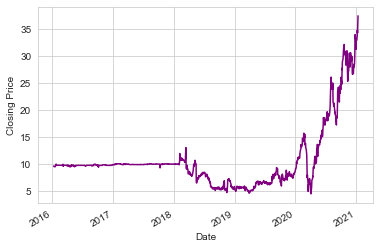

In [4]:
PRPL['Close'].plot(color = ('purple'))
plt.xlabel('Date')
plt.ylabel('Closing Price')

#### Function to convert daily stock data to weekly:

Function created to easily convert daily stock data to weekly. This data needed to be in weekly form to be consistent with the data pulled from google trends. This makes the concatination of the two dataframes simple and easy. All of the stock data was converted to weekly information, something to note is that the "Open" column now contained the stock price on the first day of the week, the "Close" and "Adj Close" columns now contained the closing stock price for the end of the week. The Volume was a sum of all of the stock trading volume for each day in the week. The weekly data reads exactly the same as it would if you where to look at Yahoo Finance and set it historical stock data to weekly with one exception. The date index must be set to Sunday for each week. Traditionally the date representing the week would be a Wednsday but this had to be changed to remain a consistent date index for the google trends data. None of the data is different, each row would just be for "The Week of Sunday the X" instead of "The Week of Wednsday the X".

In [5]:
def convert_to_weekly(df):
    
    # Resample all of the data to convert data to weekly
    output = df.resample('W',loffset=pd.offsets.timedelta(days=-7)).apply(
        {'Open': 'first',
         'High': 'max',
         'Low': 'min',
         'Close': 'last',
         'Volume': 'sum',
         'Adj Close': 'last'})
    
    # Output of the new dataframes
    output = output[['Open', 'High', 'Low', 'Close', 'Volume','Adj Close']]
    df =  output
    return df

#### Using function on Stock Data:

In [6]:
PRPL = convert_to_weekly(PRPL)
TSLA = convert_to_weekly(TSLA)
GOOG = convert_to_weekly(GOOG)

#### Viewing converted stock data:

In [7]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-10,716.609985,734.739990,685.369995,694.450012,12450700,694.450012
2016-01-17,703.299988,728.130005,673.260010,725.250000,10137100,725.250000
2016-01-24,723.580017,744.989990,694.390015,742.950012,11388300,742.950012
2016-01-31,750.460022,789.869995,680.150024,683.570007,27932700,683.570007
2016-02-07,667.849976,701.309998,663.059998,682.400024,15659700,682.400024


#### Retrieving data from Google Trends using pytrend:

The data for search interested was gathered using he pytrend library. The data gathered represents the search interest in a particular search. Here is the description for the data copied from Google Trends:

Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

In [8]:
pytrend = TrendReq()
pytrend.build_payload(kw_list=['PRPL','Purple Stock','Purple Stock Price'],
     cat=0,
     timeframe= 'today 5-y')
sPRPL = pytrend.interest_over_time()
sPRPL = sPRPL.drop(columns = 'isPartial')

In [9]:
pytrend = TrendReq()
pytrend.build_payload(kw_list=['TSLA', 'Tesla Stock', 'Tesla Stock Price'],
     cat=0,
     timeframe= 'today 5-y')
sTSLA = pytrend.interest_over_time()
sTSLA = sTSLA.drop(columns = 'isPartial')

In [10]:
pytrend = TrendReq()
pytrend.build_payload(kw_list=['GOOG','Google Stock','Google Stock Price'],
     cat=0,
     timeframe= 'today 5-y')
sGOOG = pytrend.interest_over_time()
sGOOG = sGOOG.drop(columns = 'isPartial')

#### Plotting search interest data:

Text(0, 0.5, 'Ticker Search Interest')

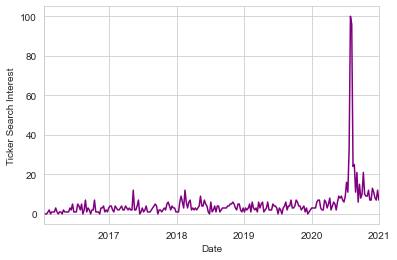

In [11]:
sPRPL['PRPL'].plot(color=('purple'))
plt.xlabel('Date')
plt.ylabel('Ticker Search Interest')

#### Concatinating the two dataframes into one:

In [12]:
dfPRPL = pd.concat([PRPL,sPRPL],axis=1)
dfTSLA = pd.concat([TSLA,sTSLA],axis=1)
dfGOOG = pd.concat([GOOG,sGOOG],axis=1)

#### Viewing new datatable:

In [13]:
dfPRPL.head()

,Open,High,Low,Close,Volume,Adj Close,PRPL,Purple Stock,Purple Stock Price
2016-01-10,9.66,9.70,9.56,9.56,778300,9.56,NaN,NaN,NaN
2016-01-17,9.56,9.71,9.56,9.71,5000,9.71,0.0,4.0,0.0
2016-01-24,9.70,10.00,9.70,9.82,2300,9.82,0.0,2.0,0.0
2016-01-31,9.82,9.82,9.82,9.82,0,9.82,0.0,3.0,0.0
2016-02-07,9.82,9.82,9.82,9.82,0,9.82,1.0,8.0,0.0


#### Converting the data and cleaning it up:

For the data I would like to view, my hypothesis is that heavy search interest in a stock price for a certain week will also mean a high percentage change in the stock. These percentage changes could be reflected as both positive or negative, but since for the purposes of this project I am only looking for high percentage changes (positive or negative), I will change those values to absolute values. This code creates a column that records the return using pct_change and then converts an absolute value stored under column Absolute_Pct_Change.

The dropna() is to drop null values in order to clean up the data.

Another thing I did was take the mean of the search interest values. I need 1 value to compare search interest to changes in stock price and traded stock volume.

In [14]:
#Creating Return and Absolute_Pct_Change Columns
dfPRPL['Return'] = dfPRPL['Adj Close'].pct_change()
dfPRPL['Absolute_Pct_Change'] = dfPRPL['Return'].abs()

dfTSLA['Return'] = dfTSLA['Adj Close'].pct_change()
dfTSLA['Absolute_Pct_Change'] = dfTSLA['Return'].abs()

dfGOOG['Return'] = dfGOOG['Adj Close'].pct_change()
dfGOOG['Absolute_Pct_Change'] = dfGOOG['Return'].abs()

#Cleaning up null values
dfPRPL = dfPRPL.dropna()
dfTSLA = dfTSLA.dropna()
dfGOOG = dfGOOG.dropna()

#Creating Average_Search_Interest column
dfPRPL['Average_Search_Interest'] = ((dfPRPL['PRPL'] + dfPRPL['Purple Stock'] + dfPRPL['Purple Stock Price'])/3)
dfTSLA['Average_Search_Interest'] = ((dfTSLA['TSLA'] + dfTSLA['Tesla Stock'] + dfTSLA['Tesla Stock Price'])/3)
dfGOOG['Average_Search_Interest'] = ((dfGOOG['GOOG'] + dfGOOG['Google Stock'] + dfGOOG['Google Stock Price'])/3)

#### Viewing the final data to be analyzed:

In [15]:
dfGOOG.head()

,Open,High,Low,Close,Volume,Adj Close,GOOG,Google Stock,Google Stock Price,Return,Absolute_Pct_Change,Average_Search_Interest
2016-01-17,703.299988,728.130005,673.260010,725.250000,10137100,725.250000,86.0,16.0,2.0,0.044352,0.044352,34.666667
2016-01-24,723.580017,744.989990,694.390015,742.950012,11388300,742.950012,87.0,17.0,3.0,0.024405,0.024405,35.666667
2016-01-31,750.460022,789.869995,680.150024,683.570007,27932700,683.570007,100.0,23.0,4.0,-0.079925,0.079925,42.333333
2016-02-07,667.849976,701.309998,663.059998,682.400024,15659700,682.400024,88.0,20.0,4.0,-0.001712,0.001712,37.333333
2016-02-14,692.979980,712.349976,685.049988,700.909973,8485100,700.909973,87.0,16.0,3.0,0.027125,0.027125,35.333333


#### Viewing regression plots for search interest and absolute percent change:

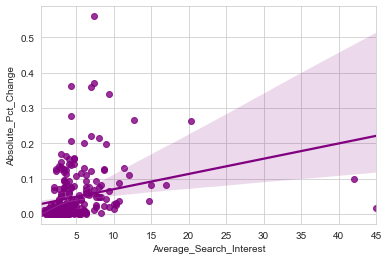

In [16]:
sns.regplot(x = dfPRPL['Average_Search_Interest'], y = dfPRPL['Absolute_Pct_Change'], color = 'purple')

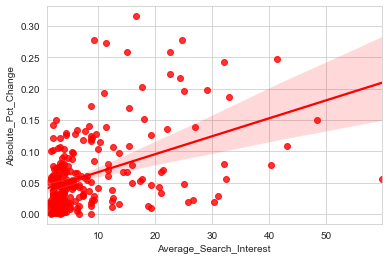

In [17]:
sns.regplot( x = dfTSLA['Average_Search_Interest'], y = dfTSLA['Absolute_Pct_Change'], color = 'red')

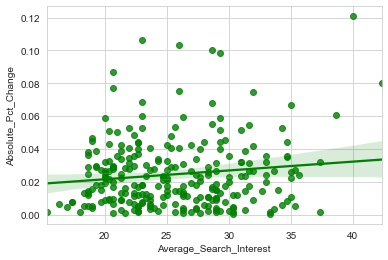

In [18]:
sns.regplot(x = dfGOOG['Average_Search_Interest'], y = dfGOOG['Absolute_Pct_Change'], color = 'green')

#### Viewing regression plots for search interest and trading volume:

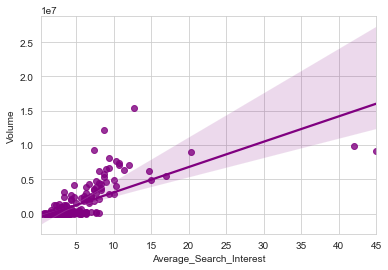

In [19]:
sns.regplot(x = dfPRPL['Average_Search_Interest'], y = dfPRPL['Volume'], color = 'purple')

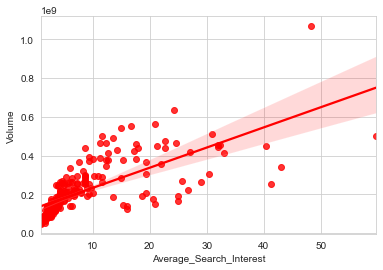

In [20]:
sns.regplot(x = dfTSLA['Average_Search_Interest'], y = dfTSLA['Volume'], color = 'red')

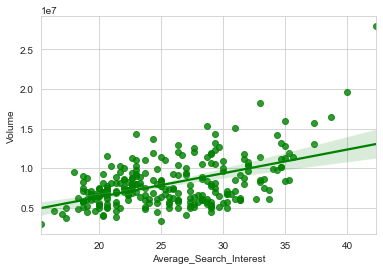

In [21]:
sns.regplot(x = dfGOOG['Average_Search_Interest'], y = dfGOOG['Volume'], color = 'green')

#### Creating Statistical Models:

This code is creating a statistical OLS model in order to get the necessary values to return linear regression equations and the coefficient of determination (R^2).

In [22]:
modelSPRPL = sm.ols('Absolute_Pct_Change ~ Average_Search_Interest',data=dfGOOG)
modelSPRPL = modelSPRPL.fit()

modelSTSLA = sm.ols('Absolute_Pct_Change ~ Average_Search_Interest',data=dfTSLA)
modelSTSLA = modelSTSLA.fit()

modelSGOOG = sm.ols('Absolute_Pct_Change ~ Average_Search_Interest',data=dfGOOG)
modelSGOOG = modelSGOOG.fit()

modelVPRPL = sm.ols('Volume ~ Average_Search_Interest',data=dfPRPL)
modelVPRPL = modelVPRPL.fit()

modelVTSLA = sm.ols('Volume ~ Average_Search_Interest',data=dfTSLA)
modelVTSLA = modelVTSLA.fit()

modelVGOOG = sm.ols('Volume ~ Average_Search_Interest',data=dfGOOG)
modelVGOOG = modelVGOOG.fit()

models = [modelSPRPL,modelSTSLA,modelSGOOG,modelVPRPL,modelVTSLA,modelVGOOG]

#### Function to properly display regression equation information and R squared:

In [23]:
def displayRegression(model,Title):
    print(Title)
    print(model.params)
    print('R Squared:', model.rsquared)
    print()

#### Viewing regression information:

In [24]:
displayRegression(modelSPRPL,'Search Interest and Absolute Percent Change: PRPL')
displayRegression(modelSTSLA,'Search Interest and Absolute Percent Change: TSLA')
displayRegression(modelSGOOG,'Search Interest and Absolute Percent Change: GOOG')
displayRegression(modelVPRPL,'Search Interest and Volume: PRPL')
displayRegression(modelVTSLA,'Search Interest and Volume: TSLA')
displayRegression(modelVGOOG,'Search Interest and Volume: GOOG')

Search Interest and Absolute Percent Change: PRPL
Intercept                  0.010776
Average_Search_Interest    0.000537
dtype: float64
R Squared: 0.016991604904127322

Search Interest and Absolute Percent Change: TSLA
Intercept                  0.038071
Average_Search_Interest    0.002870
dtype: float64
R Squared: 0.18894078874945752

Search Interest and Absolute Percent Change: GOOG
Intercept                  0.010776
Average_Search_Interest    0.000537
dtype: float64
R Squared: 0.016991604904127322

Search Interest and Volume: PRPL
Intercept                 -606006.643575
Average_Search_Interest    369414.214380
dtype: float64
R Squared: 0.49841230625349686

Search Interest and Volume: TSLA
Intercept                  1.288814e+08
Average_Search_Interest    1.041760e+07
dtype: float64
R Squared: 0.5262441774924798

Search Interest and Volume: GOOG
Intercept                  340851.976330
Average_Search_Interest    299920.414654
dtype: float64
R Squared: 0.25683895169741644



# Conclusion:

The results of studying these three stocks have come to show me that in most cases their appears to be a positive linear relationship between search interest and stock trading volume as well as search interest and absolute percent change in a stocks price. The greatest R squared among these is currently the relationship between Search interest and stock trading volume for TSLA. The equation for that line currently is y = 129,011,100 + 10,411,420x. This means for each 1 score in stock interest rising there is 10,411,420 stocks or options traded. That of course is with a R squared of .52 but still it gives us a little understanding of how these things correlate. It would make sense too that higher number of people searching these terms would result in a higher level of trading value. This would hold especially true for a "Hype Stock" such as Tesla.

This project has been attempt to showcase my ability to manipulate, visualize, and analyze data using python. Thank you for reading.